In [1]:
## Deleted unnecessary columns. Deleted nulls for some columns. Replaced nulls for other columns. Converted dates. Converted runtime to int64.

In [2]:
import pandas as pd

In [3]:
df_rt_info = pd.read_csv('rt.movie_info.tsv.gz', sep = '\t')
df_rt_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [4]:
df_rt_info.shape

(1560, 12)

In [5]:
##Dropping unneeded columns, synopsis and studio.

In [6]:
df_rt_info = df_rt_info.drop(columns = ['synopsis', 'studio'])
df_rt_info

,id,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes
4,7,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes
...,...,...,...,...,...,...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes
1556,1997,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes


In [7]:
df_rt_info.isna().sum()

id                 0
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
dtype: int64

In [8]:
##Deleting rows with nulls in rating, genre, and runtime. 34 rows.

In [9]:
df_rt_info.dropna(subset = ['rating', 'genre', 'runtime'], inplace = True)
df_rt_info.head()

,id,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes
4,7,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes


In [10]:
df_rt_info['currency'].value_counts()

$    338
Name: currency, dtype: int64

In [11]:
df_rt_info['box_office'].value_counts()

200,000        2
20,900,803     2
600,000        2
32,000,000     2
145,778        1
              ..
148,734,225    1
406,235        1
2,974,308      1
241,250,669    1
81,157,671     1
Name: box_office, Length: 334, dtype: int64

In [12]:
##Dropping columns currency and box_office. The box_office info could be used in a different dataframe by dropping nulls and have way less info.

In [13]:
df_rt_info = df_rt_info.drop(columns = ['currency', 'box_office'])
df_rt_info

,id,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes
4,7,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,200 minutes
...,...,...,...,...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",106 minutes
1556,1997,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",88 minutes
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",111 minutes
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",101 minutes


In [14]:
##Fill missing values with fluff. Director-- director filler. Writer-- writer filler. Theater_date and dvd_date--01/01/1920. Change dates.

In [15]:
df_rt_info['director'].fillna('director filler', inplace = True)
df_rt_info

,id,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes
4,7,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,200 minutes
...,...,...,...,...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,director filler,NaN,"Aug 18, 2006","Jan 2, 2007",106 minutes
1556,1997,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",88 minutes
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",111 minutes
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",101 minutes


In [16]:
df_rt_info['writer'].fillna('writer filler', inplace = True)
df_rt_info

,id,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes
4,7,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,200 minutes
...,...,...,...,...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,director filler,writer filler,"Aug 18, 2006","Jan 2, 2007",106 minutes
1556,1997,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",88 minutes
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,writer filler,"Jan 1, 1962","May 11, 2004",111 minutes
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",101 minutes


In [17]:
df_rt_info['theater_date'] = pd.to_datetime(df_rt_info.theater_date)
df_rt_info

,id,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,"Sep 25, 2001",104 minutes
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",108 minutes
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,"Apr 18, 2000",116 minutes
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,"Aug 27, 1997",128 minutes
4,7,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaT,NaN,200 minutes
...,...,...,...,...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,director filler,writer filler,2006-08-18,"Jan 2, 2007",106 minutes
1556,1997,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,1993-07-23,"Apr 17, 2001",88 minutes
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,writer filler,1962-01-01,"May 11, 2004",111 minutes
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,1993-04-01,"Jan 29, 2002",101 minutes


In [18]:
df_rt_info['dvd_date'] = pd.to_datetime(df_rt_info.dvd_date)
df_rt_info

,id,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,104 minutes
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,108 minutes
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,116 minutes
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,128 minutes
4,7,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaT,NaT,200 minutes
...,...,...,...,...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,director filler,writer filler,2006-08-18,2007-01-02,106 minutes
1556,1997,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,1993-07-23,2001-04-17,88 minutes
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,writer filler,1962-01-01,2004-05-11,111 minutes
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,1993-04-01,2002-01-29,101 minutes


In [19]:
df_rt_info['theater_date'].fillna('1920-01-01').isna().sum()


0

In [20]:
df_rt_info['theater_date'].fillna('1920-01-01', inplace = True)
df_rt_info.isna().sum()

id                0
rating            0
genre             0
director          0
writer            0
theater_date      0
dvd_date        332
runtime           0
dtype: int64

In [21]:
df_rt_info['dvd_date'].fillna('1920-01-01', inplace = True)
df_rt_info.isna().sum()

id              0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
runtime         0
dtype: int64

In [22]:
df_rt_info.dtypes

id               int64
rating          object
genre           object
director        object
writer          object
theater_date    object
dvd_date        object
runtime         object
dtype: object

In [23]:
##Rename runtime to runtime_in_minutes so we don't lose the units when we change values.

In [24]:
df_rt_info.rename(columns = {'runtime': 'runtime_in_minutes'}, inplace = True)
df_rt_info

,id,rating,genre,director,writer,theater_date,dvd_date,runtime_in_minutes
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09 00:00:00,2001-09-25 00:00:00,104 minutes
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17 00:00:00,2013-01-01 00:00:00,108 minutes
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13 00:00:00,2000-04-18 00:00:00,116 minutes
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09 00:00:00,1997-08-27 00:00:00,128 minutes
4,7,NR,Drama|Romance,Rodney Bennett,Giles Cooper,1920-01-01,1920-01-01,200 minutes
...,...,...,...,...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,director filler,writer filler,2006-08-18 00:00:00,2007-01-02 00:00:00,106 minutes
1556,1997,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,1993-07-23 00:00:00,2001-04-17 00:00:00,88 minutes
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,writer filler,1962-01-01 00:00:00,2004-05-11 00:00:00,111 minutes
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,1993-04-01 00:00:00,2002-01-29 00:00:00,101 minutes


In [25]:
##Remove the string 'minutes' from runtime_in_minutes

In [26]:
df_rt_info['runtime_in_minutes'] = df_rt_info['runtime_in_minutes'].str.rstrip('minutes')


In [27]:
df_rt_info

,id,rating,genre,director,writer,theater_date,dvd_date,runtime_in_minutes
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09 00:00:00,2001-09-25 00:00:00,104
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17 00:00:00,2013-01-01 00:00:00,108
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13 00:00:00,2000-04-18 00:00:00,116
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09 00:00:00,1997-08-27 00:00:00,128
4,7,NR,Drama|Romance,Rodney Bennett,Giles Cooper,1920-01-01,1920-01-01,200
...,...,...,...,...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,director filler,writer filler,2006-08-18 00:00:00,2007-01-02 00:00:00,106
1556,1997,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,1993-07-23 00:00:00,2001-04-17 00:00:00,88
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,writer filler,1962-01-01 00:00:00,2004-05-11 00:00:00,111
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,1993-04-01 00:00:00,2002-01-29 00:00:00,101


In [28]:
##Change runtime_in_minutes datatype to int

In [29]:
df_rt_info.runtime_in_minutes = df_rt_info.runtime_in_minutes.astype('int64')

In [30]:
df_rt_info.dtypes

id                     int64
rating                object
genre                 object
director              object
writer                object
theater_date          object
dvd_date              object
runtime_in_minutes     int64
dtype: object

In [31]:
df_rt_info

,id,rating,genre,director,writer,theater_date,dvd_date,runtime_in_minutes
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09 00:00:00,2001-09-25 00:00:00,104
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17 00:00:00,2013-01-01 00:00:00,108
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13 00:00:00,2000-04-18 00:00:00,116
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09 00:00:00,1997-08-27 00:00:00,128
4,7,NR,Drama|Romance,Rodney Bennett,Giles Cooper,1920-01-01,1920-01-01,200
...,...,...,...,...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,director filler,writer filler,2006-08-18 00:00:00,2007-01-02 00:00:00,106
1556,1997,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,1993-07-23 00:00:00,2001-04-17 00:00:00,88
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,writer filler,1962-01-01 00:00:00,2004-05-11 00:00:00,111
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,1993-04-01 00:00:00,2002-01-29 00:00:00,101


In [32]:
##Just for fun because I need to make a few graphs for practice.

In [34]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'instances')

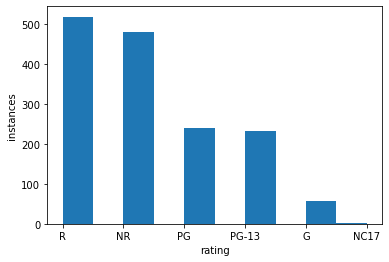

In [45]:


fig, ax = plt.subplots()

ax.hist(df_rt_info['rating'])
ax.set_xlabel('rating')
ax.set_ylabel('instances')


In [46]:
means_of_runtimes = df_rt_info.groupby('rating').mean()['runtime_in_minutes']

In [47]:
means_of_runtimes

rating
G         97.912281
NC17      89.000000
NR       100.162839
PG       104.748954
PG-13    107.375000
R        106.611969
Name: runtime_in_minutes, dtype: float64

<BarContainer object of 6 artists>

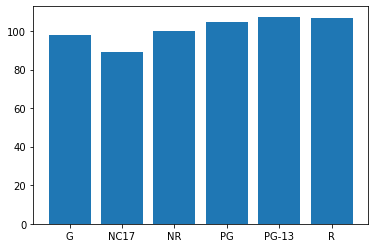

In [49]:
fig, ax = plt.subplots()

ax.bar(x = means_of_runtimes.index, height = means_of_runtimes.values)

In [53]:
df_rt_info['director'].value_counts()

director filler                 182
Steven Spielberg                 10
Clint Eastwood                    8
Jim Jarmusch                      4
Curtis Hanson                     4
                               ... 
Jayro Bustamante                  1
Ron Underwood                     1
John Hayes                        1
Stephen Sommers                   1
Norman Taurog|Busby Berkeley      1
Name: director, Length: 1115, dtype: int64